In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [2]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [3]:
import datetime as dt

In [4]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [5]:
df=data.loc['0':'207']

In [6]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [7]:
X1 = df[['NO2y1','NO2y2','NO2y3','year', 'month', 'day']]
Y1 = df['NO2']

In [8]:
X1

,NO2y1,NO2y2,NO2y3,year,month,day
0,95.130000,99.385714,45.755000,2016,1,3
1,84.445714,79.677143,68.111429,2016,1,10
2,73.867143,76.207143,61.645714,2016,1,17
3,88.392857,89.930000,98.222857,2016,1,24
4,100.797143,99.442857,94.730000,2016,1,31
...,...,...,...,...,...,...
203,101.784286,102.722857,94.672857,2019,12,1
204,107.428571,127.561429,100.610000,2019,12,8
205,84.142857,124.638571,98.288571,2019,12,15
206,102.625714,72.678571,86.021429,2019,12,22


In [48]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=9)

In [85]:
forest = RandomForestRegressor(n_estimators=2000,
                              max_depth=10,
                              max_features='log2',
                              min_samples_split=6,
                              min_samples_leaf=2,random_state=2)

forest.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=10, max_features='log2', min_samples_leaf=2,
                      min_samples_split=6, n_estimators=2000, random_state=2)

In [86]:
# we now score the model
print('Score on train data: {}\n'.format(forest.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest.score(xtest,ytest)))

forest_pred = forest.predict(xtest)
forest_mse = mean_squared_error(ytest,forest_pred)
forest_accuracy = r2_score(ytest,forest_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_mse)))
print('Overall model accuracy: {}'.format(forest_accuracy))

Score on train data: 0.8131706625922599

Score on test data: 0.582808840596047

Root Mean Squared Error: 16.317361058848157

Overall model accuracy: 0.582808840596047


In [87]:
test=data.loc['207':'259']
X=test[['NO2y1','NO2y2','NO2y3','year', 'month', 'day']]
X

,NO2y1,NO2y2,NO2y3,year,month,day
207,76.847143,81.828571,83.730000,2019,12,29
208,52.067143,78.085714,67.225714,2020,1,5
209,58.215714,86.725714,57.842857,2020,1,12
210,58.545714,79.045714,75.028571,2020,1,19
211,44.648571,68.768571,68.434286,2020,1,26
212,49.550000,40.208571,62.091429,2020,2,2
213,50.381429,104.145714,66.960000,2020,2,9
214,72.708571,61.682857,67.874286,2020,2,16
215,73.708571,91.308571,82.401429,2020,2,23
216,88.330000,77.098571,62.438571,2020,3,1


In [88]:
predict=forest.predict(X)

In [89]:
predict

array([48.93838058, 65.34253951, 64.09310029, 64.37327936, 59.1890541 ,
       60.72554127, 63.33753771, 60.41901802, 62.85269888, 66.34037586,
       69.55484196, 61.62196612, 57.89916418, 59.86477295, 67.87176573,
       63.29028865, 58.90989814, 61.54334477, 57.64849026, 61.20939933,
       56.77998219, 56.97490517, 53.13737834, 58.49030017, 52.15313259,
       55.32612031, 56.76748395, 49.86792459, 50.5027937 , 36.39765861,
       35.63263809, 35.09259733, 33.9197379 , 31.9921431 , 34.32457205,
       32.33005091, 33.45607917, 32.90069246, 33.86993524, 40.4326725 ,
       49.64584738, 58.05826228, 54.05287158, 53.67798545, 44.37582546,
       51.8242586 , 51.76648151, 54.65187032, 54.14087986, 53.54334757,
       52.62371867, 52.21916555, 52.362728  ])

In [90]:
dates=data.loc['207':'259','From Date']

In [91]:
dates

207    737422
208    737429
209    737436
210    737443
211    737450
212    737457
213    737464
214    737471
215    737478
216    737485
217    737492
218    737499
219    737506
220    737513
221    737520
222    737527
223    737534
224    737541
225    737548
226    737555
227    737562
228    737569
229    737576
230    737583
231    737590
232    737597
233    737604
234    737611
235    737618
236    737625
237    737632
238    737639
239    737646
240    737653
241    737660
242    737667
243    737674
244    737681
245    737688
246    737695
247    737702
248    737709
249    737716
250    737723
251    737730
252    737737
253    737744
254    737751
255    737758
256    737765
257    737772
258    737779
259    737786
Name: From Date, dtype: int64

In [92]:
X['From Date']=dates.values

In [93]:
X.columns

Index(['NO2y1', 'NO2y2', 'NO2y3', 'year', 'month', 'day', 'From Date'], dtype='object')

In [94]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [95]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [96]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [97]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

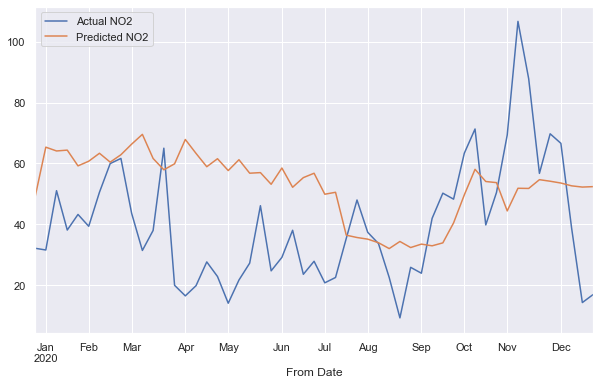

In [98]:
test['NO2'].plot(legend=True, label='Actual NO2', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted NO2')

In [99]:
np.sqrt(mean_squared_error(test['NO2'],X['pred']))

25.492434730342204

In [100]:
mae = metrics.mean_absolute_error(ytest, forest_pred)
mse = metrics.mean_squared_error(ytest, forest_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,forest_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 13.432796831732114
MSE: 266.2562719248142
RMSE: 16.317361058848157
R-Squared: 0.582808840596047


In [101]:
mae = metrics.mean_absolute_error(test['NO2'],X['pred'])
mse = metrics.mean_squared_error(test['NO2'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['NO2'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 21.32840934954532
MSE: 649.8642284807573
RMSE: 25.492434730342204
R-Squared: -0.6574421880581316


In [102]:
import pickle
filename = 'NO2_forest3y.sav'
pickle.dump(forest, open(filename, 'wb'))

In [103]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.582808840596047


# 3rd plot

In [104]:
testcase = pd.DataFrame()

In [105]:
testcase['test']=ytest
testcase['pred']=forest_pred

In [106]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [107]:
testcase

,test,pred,Corrected
27,48.124286,47.770197,64.087558
106,79.045714,66.156462,82.473823
130,73.278571,48.186993,64.504354
80,37.995714,39.457326,23.139965
172,78.094286,59.166905,75.484266
53,57.842857,76.939499,60.622138
204,56.087143,67.786733,51.469372
163,73.708571,64.942496,81.259857
38,60.510000,30.833715,47.151076
127,37.104286,55.857408,39.540047


<AxesSubplot:>

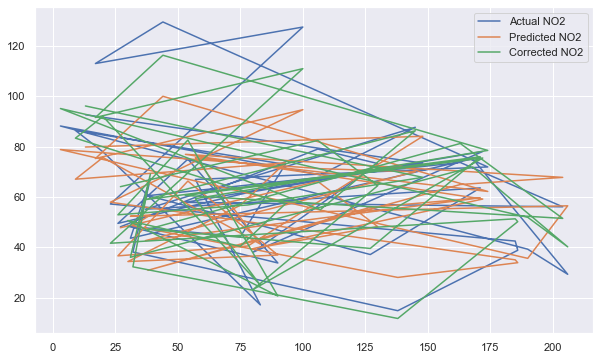

In [108]:
testcase['test'].plot(legend=True, label='Actual NO2', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted NO2')
testcase["Corrected"].plot(legend=True, label='Corrected NO2')

In [109]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.8358372269135304

In [110]:
test2020=pd.DataFrame()

In [111]:
test2020['test']=test['NO2']
test2020['pred']=X['pred']

In [112]:
test2020.index=test.index

In [113]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

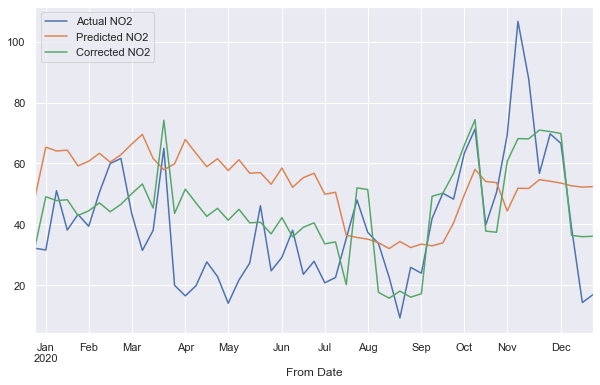

In [114]:
test2020['test'].plot(legend=True, label='Actual NO2', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted NO2')
test2020["Corrected"].plot(legend=True, label='Corrected NO2')

In [115]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

-0.016690773243019486